<a href="https://colab.research.google.com/github/sergejhorvat/Tensorflow2.0_Udemy/blob/master/Building_a_Convolutional_Neural_Network_in_TensorFlow_2_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stage 1: Installing dependencies and notebook gpu setup

In [2]:
!pip install tensorflow-gpu==2.0.0rc0

     |████████████████████████████████| 380.5MB 81kB/s 
     |████████████████████████████████| 4.3MB 42.0MB/s 
     |████████████████████████████████| 501kB 67.3MB/s 


## Stage 2: Importing dependencies for the project

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'1.14.0'

## Stage 3: Dataset preprocessing

### Loading the Cifar10 dataset

In [0]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Image normalization

In [0]:
X_train = X_train / 255.0

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

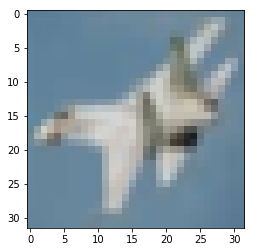

In [10]:
plt.imshow(X_test[10])

## Stage 4: Building a Convolutional neural network

### Defining the model

In [0]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu
    input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Flatten layer

In [0]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [88]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [91]:
model.fit(X_train, y_train, epochs=12 ,batch_size=128)

Epoch 1/12
50000/50000 [==============================] - 5s 102us/sample - loss: 1.5672 - sparse_categorical_accuracy: 0.4290
Epoch 2/12
50000/50000 [==============================] - 5s 93us/sample - loss: 1.1464 - sparse_categorical_accuracy: 0.5939
Epoch 3/12
50000/50000 [==============================] - 5s 93us/sample - loss: 0.9497 - sparse_categorical_accuracy: 0.6660
Epoch 4/12
50000/50000 [==============================] - 5s 94us/sample - loss: 0.8312 - sparse_categorical_accuracy: 0.7088
Epoch 5/12
50000/50000 [==============================] - 5s 94us/sample - loss: 0.7520 - sparse_categorical_accuracy: 0.7375
Epoch 6/12
50000/50000 [==============================] - 5s 94us/sample - loss: 0.6798 - sparse_categorical_accuracy: 0.7613
Epoch 7/12
50000/50000 [==============================] - 5s 94us/sample - loss: 0.6186 - sparse_categorical_accuracy: 0.7809
Epoch 8/12
50000/50000 [==============================] - 5s 94us/sample - loss: 0.5671 - sparse_categorical_accuracy

### Model evaluation and prediction

In [92]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 97us/sample - loss: 0.6908 - sparse_categorical_accuracy: 0.7710


In [93]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7710000276565552
